In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, LSTM, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Loading Dataset
df_test = pd.read_csv("E:/Mini_project_datasets/test_separated.csv")
df_train = pd.read_csv("E:/Mini_project_datasets/train_separated.csv")


In [3]:
# Function to clean up text
def processed_comments(df, text_column):
    not_alphanumeric = re.compile(r'[\W]')
    not_ascii = re.compile(r'[^a-z0-1\s]')
    
    processed_comments = []
    for comment in df[text_column]:
        lower = comment.lower()
        no_punctuation = not_alphanumeric.sub(r' ', lower)
        no_non_ascii = not_ascii.sub(r'', no_punctuation)
        processed_comments.append(no_non_ascii)
    
    df["processed_comments"] = processed_comments
    return df

df_test = processed_comments(df_test, "comment")
df_train = processed_comments(df_train, "comment")


In [4]:
# Model creation: Simple CNN
max_words = 10000
max_sequence_length = 100

encoder = tf.keras.layers.TextVectorization(max_tokens=max_words)
encoder.adapt(df_train["processed_comments"].values)

model = Sequential([
    Input(shape=(1,), dtype=tf.string),
    encoder,
    Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(5),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

# Train the model
history = model.fit(
    x=df_train["processed_comments"].values,
    y=df_train["label"],
    epochs=5,
    validation_data=(df_test["processed_comments"].values, df_test["label"])
)

C:\Users\2111s\anaconda3\Lib\site-packages\keras\src\layers\layer.py:857: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ (None, None)                │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, None, 64)            │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, None, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, None, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 128)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 689,409 (2.63 MB)

 Trainable params: 689,409 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
32768/32768 ━━━━━━━━━━━━━━━━━━━━ 490s 15ms/step - accuracy: 0.8943 - loss: 0.2419 - val_accuracy: 0.9357 - val_loss: 0.1759
Epoch 2/5
32768/32768 ━━━━━━━━━━━━━━━━━━━━ 475s 14ms/step - accuracy: 0.9395 - loss: 0.1573 - val_accuracy: 0.9361 - val_loss: 0.1654
Epoch 3/5
32768/32768 ━━━━━━━━━━━━━━━━━━━━ 476s 15ms/step - accuracy: 0.9506 - loss: 0.1324 - val_accuracy: 0.9369 - val_loss: 0.1664
Epoch 4/5
32768/32768 ━━━━━━━━━━━━━━━━━━━━ 468s 14ms/step - accuracy: 0.9597 - loss: 0.1099 - val_accuracy: 0.9359 - val_loss: 0.1798
Epoch 5/5
32768/32768 ━━━━━━━━━━━━━━━━━━━━ 472s 14ms/step - accuracy: 0.9670 - loss: 0.0906 - val_accuracy: 0.9306 - val_loss: 0.2010


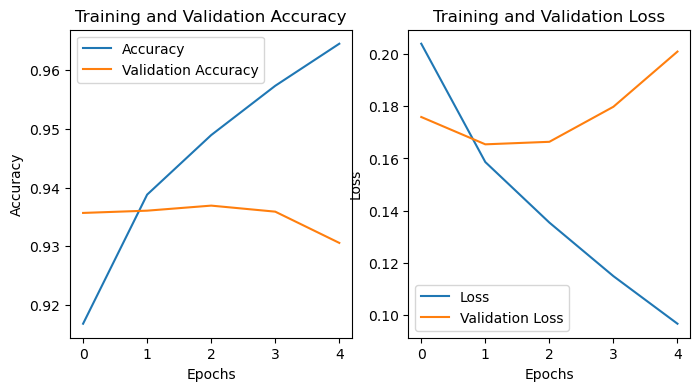

In [5]:
# Plotting the accuracy and loss over time
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step


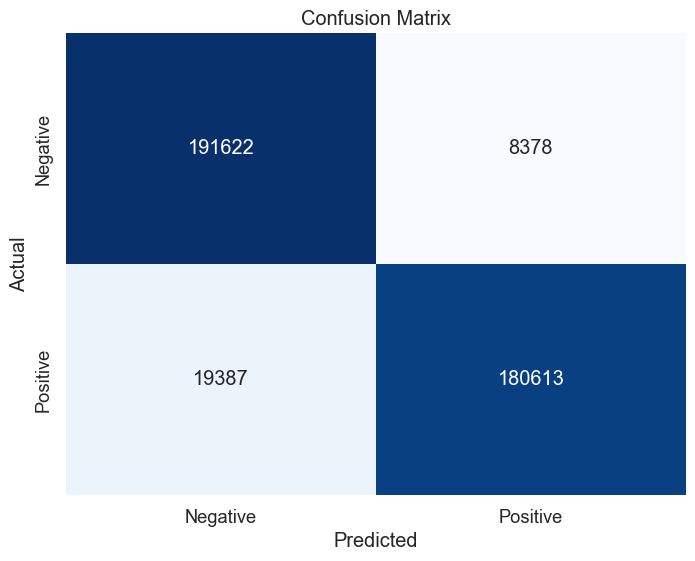

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93    200000
           1       0.96      0.90      0.93    200000

    accuracy                           0.93    400000
   macro avg       0.93      0.93      0.93    400000
weighted avg       0.93      0.93      0.93    400000



In [6]:
# Predicting labels for the test set
y_pred = model.predict(df_test["processed_comments"].values)
y_pred_classes = (y_pred > 0.5).astype(int)  # Converting probabilities to classes

# Generating confusion matrix
cm = confusion_matrix(df_test["label"], y_pred_classes)

# Displaying confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
report = classification_report(df_test["label"], y_pred_classes)
print("Classification Report:")
print(report)